# Cluster Based Analysis for Patients with BB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

% matplotlib inline

In [2]:
import pandas as pd
data = pd.read_csv("/Users/joudsi/Desktop/subdata_bb_norm_clustered.csv")

In [3]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,2,0
1,1,0.967606,0.0,0.684853,0.905051,0.322675,0.032558,0.217391,0.500000,0.501573,0.118514,0.049349,0.500000,0.555009,0,0
2,2,0.908553,0.0,0.580397,0.988272,0.180286,0.213953,0.466667,0.321429,0.402140,0.133297,0.059219,0.559524,0.414874,0,0
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,3,0
4,4,0.545732,1.0,0.706385,0.954789,0.324970,0.037209,0.172705,0.464286,0.388981,0.152040,0.068472,0.452381,0.414054,1,0


In [4]:
print("# of observations: ", str(len(data.index)))

('# of observations: ', '5997')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 16 columns):
Unnamed: 0          5997 non-null int64
amdission_age       5997 non-null float64
gender              5997 non-null float64
tempc_mean          5997 non-null float64
spo2_mean           5997 non-null float64
resprate_mean       5997 non-null float64
creatinine_mean     5997 non-null float64
potassium_mean      5997 non-null float64
bicarbonate_mean    5997 non-null float64
hematocrit_mean     5997 non-null float64
glucose_mean        5997 non-null float64
lactate_mean        5997 non-null float64
albumin_mean        5997 non-null float64
hemoglobin_mean     5997 non-null float64
clust               5997 non-null int64
is_AKI              5997 non-null int64
dtypes: float64(13), int64(3)
memory usage: 749.7 KB


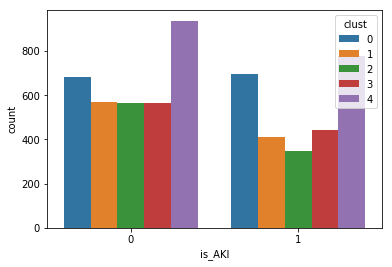

In [6]:
sns.countplot(x="is_AKI", hue="clust",data=data)

## DT Analysis C0

In [7]:
data.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,2,0
1,1,0.967606,0.0,0.684853,0.905051,0.322675,0.032558,0.217391,0.500000,0.501573,0.118514,0.049349,0.500000,0.555009,0,0
2,2,0.908553,0.0,0.580397,0.988272,0.180286,0.213953,0.466667,0.321429,0.402140,0.133297,0.059219,0.559524,0.414874,0,0
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,3,0
4,4,0.545732,1.0,0.706385,0.954789,0.324970,0.037209,0.172705,0.464286,0.388981,0.152040,0.068472,0.452381,0.414054,1,0


In [8]:
data0 = data[data['clust']==0]

In [9]:
t = data0.drop("is_AKI", axis=1)
X0 = t.drop('clust', axis = 1)
Y0 = data0["is_AKI"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X0,Y0, test_size=0.20)

In [12]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5217391304347826)


## DT Analysis C1

In [14]:
data1 = data[data['clust']==1]

In [15]:
data1.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
4,4,0.545732,1.0,0.706385,0.954789,0.324970,0.037209,0.172705,0.464286,0.388981,0.152040,0.068472,0.452381,0.414054,1,0
5,5,0.320255,1.0,0.689836,0.935043,0.473174,0.025581,0.207729,0.416667,0.266457,0.088355,0.019740,0.434524,0.269822,1,0
8,8,0.518038,1.0,0.769379,0.985185,0.253968,0.044186,0.217391,0.392857,0.672750,0.146975,0.083894,0.630952,0.675476,1,1
10,10,0.611354,1.0,0.673669,0.956322,0.356203,0.020155,0.275362,0.444444,0.426283,0.118408,0.059219,0.398810,0.433723,1,0
15,15,0.640581,1.0,0.560912,0.960684,0.353819,0.030233,0.166667,0.511905,0.376547,0.145913,0.024675,0.333333,0.417333,1,0


In [16]:
t = data1.drop("is_AKI", axis=1)
X1 = t.drop('clust', axis = 1)
Y1 = data1["is_AKI"]

In [17]:
X1.shape

(980, 14)

In [18]:
Y1.shape

(980,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.3, random_state=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.6394557823129252)


## DT Analysis C2

In [27]:
data2 = data[data['clust']==2]

In [28]:
data2.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
0,0,0.558335,0.0,0.713859,0.903968,0.346149,0.032558,0.246377,0.452381,0.735683,0.081558,0.050583,0.666667,0.820529,2,0
11,11,0.393875,0.0,0.660688,0.938384,0.205227,0.041860,0.299517,0.476190,0.711349,0.116391,0.175191,0.654762,0.727105,2,0
18,18,0.551827,0.0,0.710656,0.955637,0.322799,0.051163,0.239130,0.511905,0.535557,0.123612,0.034545,0.535714,0.577136,2,0
20,20,0.432388,0.0,0.662182,0.908333,0.221600,0.079070,0.318841,0.547619,0.565765,0.115541,0.065388,0.452381,0.621389,2,0
27,27,0.818749,0.0,0.648729,0.974411,0.292583,0.030233,0.463768,0.369048,0.681141,0.208356,0.097054,0.642857,0.700061,2,0


In [29]:
t = data2.drop("is_AKI", axis=1)
X2 = t.drop('clust', axis = 1)
Y2 = data2["is_AKI"]

In [30]:
X2.shape

(913, 14)

In [31]:
Y2.shape

(913,)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X2,Y2, test_size=0.3, random_state=1)

In [34]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.6277372262773723)


## DT Analysis C3

In [35]:
data3 = data[data['clust']==3]

In [36]:
data3.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
3,3,0.585965,0.0,0.588939,0.950327,0.240689,0.055814,0.355072,0.238095,0.385777,0.131258,0.098699,0.238095,0.385372,3,0
17,17,0.513992,0.0,0.732009,0.917172,0.355990,0.023256,0.202899,0.523810,0.230963,0.090479,0.076492,0.357143,0.252612,3,0
21,21,0.592988,0.0,0.747758,0.960943,0.388422,0.037209,0.282609,0.476190,0.373191,0.163117,0.030843,0.464286,0.400123,3,1
26,26,0.472171,0.0,0.776852,0.995960,0.620811,0.197674,0.326087,0.392857,0.402559,0.168214,0.113504,0.345238,0.352182,3,1
32,32,0.549426,0.0,0.581465,0.905556,0.222222,0.041860,0.140097,0.690476,0.412209,0.212816,0.059219,0.619048,0.414874,3,1


In [37]:
t = data3.drop("is_AKI", axis=1)
X3 = t.drop('clust', axis = 1)
Y3 = data3["is_AKI"]

In [38]:
X3.shape

(1010, 14)

In [39]:
Y3.shape

(1010,)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X3,Y3, test_size=0.3, random_state=1)

In [42]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5907590759075908)


## LR Analysis C4

In [43]:
data4 = data[data['clust']==4]

In [44]:
data4.head()

,Unnamed: 0,amdission_age,gender,tempc_mean,spo2_mean,resprate_mean,creatinine_mean,potassium_mean,bicarbonate_mean,hematocrit_mean,glucose_mean,lactate_mean,albumin_mean,hemoglobin_mean,clust,is_AKI
9,9,1.000000,1.0,0.808171,0.932444,0.477072,0.062016,0.260870,0.380952,0.733166,0.130939,0.098699,0.583333,0.763983,4,0
12,12,0.700402,1.0,0.649975,0.997101,0.269253,0.032558,0.521739,0.404762,0.544368,0.121063,0.055518,0.666667,0.584511,4,0
23,23,0.892517,1.0,0.793871,0.967742,0.233942,0.048837,0.224638,0.333333,0.490665,0.105771,0.033311,0.619048,0.543946,4,0
24,24,0.683221,1.0,0.596413,0.992982,0.284203,0.064186,0.228986,0.204762,0.392700,0.261401,0.079782,0.726190,0.420142,4,1
28,28,0.848262,1.0,0.641256,0.964957,0.477702,0.032558,0.352657,0.468254,0.355570,0.149099,0.116465,0.250000,0.365704,4,1


In [45]:
t = data4.drop("is_AKI", axis=1)
X4 = t.drop('clust', axis = 1)
Y4 = data4["is_AKI"]

In [46]:
X4.shape

(1714, 14)

In [47]:
Y4.shape

(1714,)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X4,Y4, test_size=0.3, random_state=1)

In [50]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.6174757281553398)
